In [72]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('../Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Pre processing

In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, 
#insuline can't be zero so lets try to fix it

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

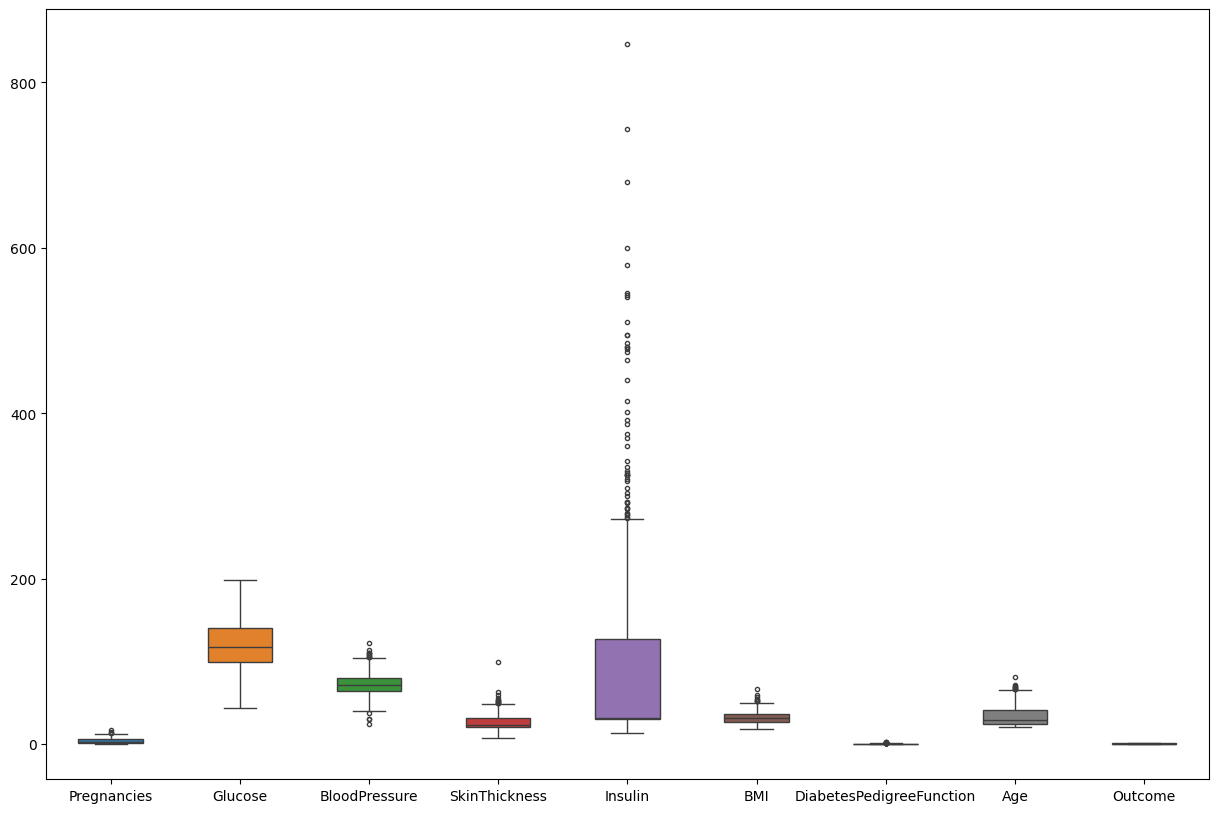

In [9]:
# Visualizing outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

### train-test-split

In [10]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

### Scaling the train and test data

In [12]:
import pickle 
def standard_scaler(X_train, X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    file=open('standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled    

In [13]:
X_train_scaled,X_test_scaled=standard_scaler(X_train,X_test)

In [14]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]], shape=(576, 8))

<Axes: >

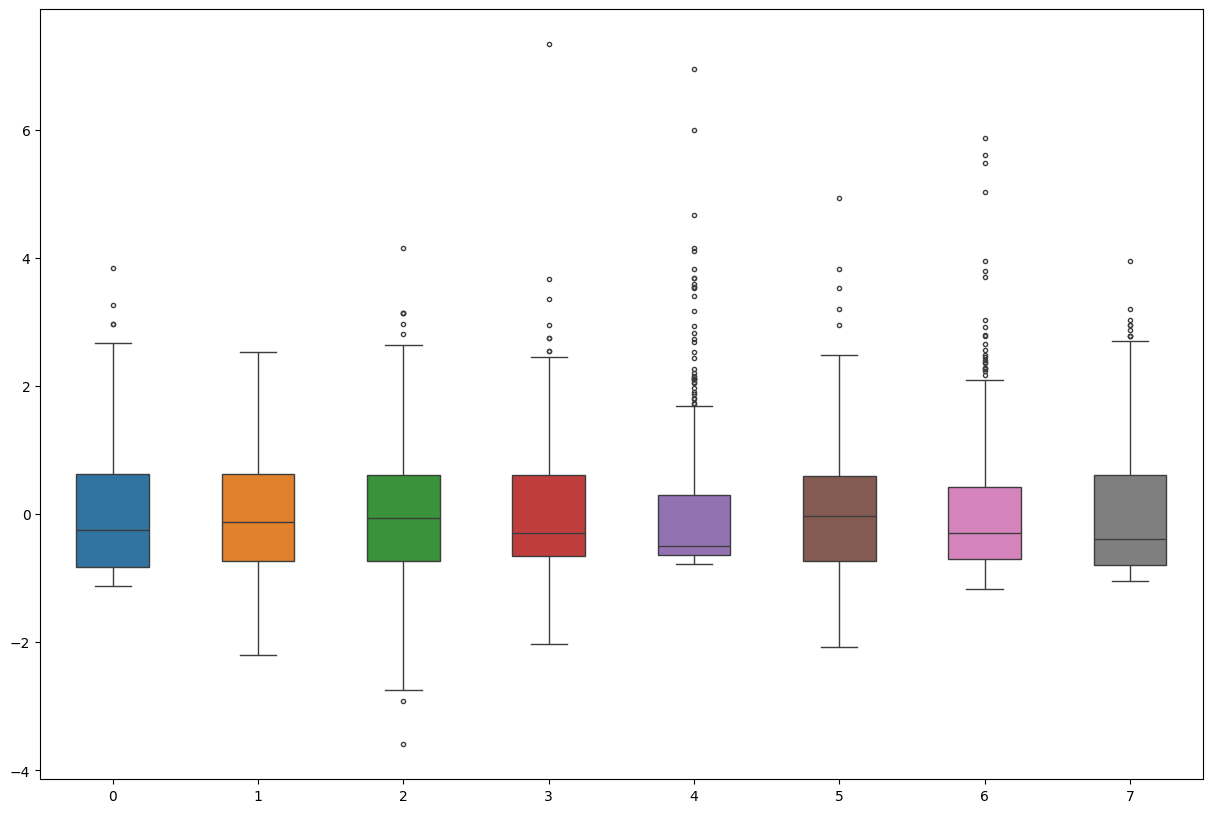

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_train_scaled, width= 0.5,ax=ax,  fliersize=3)

## Logistic Regression Model

### Model training and Hyperparameter Tuning

In [19]:
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [float(c) for c in np.logspace(-4, 4, 10)],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

best_param_score =-1
best_param ={}
n=10
for i in range(n):
    clf=GridSearchCV(LogisticRegression(), param_grid=parameters, cv=5, verbose=3, scoring='accuracy')
    clf.fit(X_train_scaled,y_train)
    
    score = clf.best_score_
    if score > best_param_score:
        best_param_score = score
        best_param=clf.best_params_



Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, penalty=l1, solver=liblinear;, score=0.638 total time=   0.0s
[CV 2/5] END C=0.0001, penalty=l1

[CV 5/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.739 total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.739 total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penal

[CV 1/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l2, solver=newton-cg;, score

[CV 5/5] END C=0.000774263682681127, penalty=l2, solver=liblinear;, score=0.765 total time=   0.0s
[CV 1/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.005994842503189409, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.005994842503189409, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.005994842503189409, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.005994842503189409, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.005994842503189409, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.005994842503189409, penalty

[CV 3/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.748

[CV 5/5] END C=0.0001, penalty=l2, solver=lbfgs;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.741 total time=   0.0s
[CV 2/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 3/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 4/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.765 total time=   0.0s
[CV 1/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] 

[CV 2/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=0.3593813663804626, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l2, solver=

[CV 1/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END

[CV 2/5] END C=0.005994842503189409, penalty=l2, solver=liblinear;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.005994842503189409, penalty=l2, solver=liblinear;, score=0.730 total time=   0.0s
[CV 4/5] END C=0.005994842503189409, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 5/5] END C=0.005994842503189409, penalty=l2, solver=liblinear;, score=0.765 total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.046415888

[CV 4/5] END C=2.782559402207126, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=n

[CV 5/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=10000.0, penalty=l2, solver=newton-cg;, score=0.776 total time=   

[CV 4/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=2.782559402207126, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=l2, solver=newton-cg;, score=0.809 total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=l2, solver=newton-cg;, score=0.748 total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=l2, solver

[CV 2/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1291.5496650148827, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1291.5496650148827, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=1291.5496650148827, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=1291.5496650148827, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=1291.5496650148827, penalty=l1, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=1291.5496650148827, penalty=l1, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=1291.5496650148827, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 2/5] END C=1291.5496650148827, penalty=l2, solver=

[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=0.3593813663804626, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l2, solver=newton-cg;, score=0.748 total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l2, solver=newton-cg;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.3593813663804626, p

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, penalty=l1, solver=liblinear;, score=0.638 total time=   0.0s
[CV 2/5] END C=0.0001, penalty=l1

[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.739 total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty

[CV 1/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.776 tot

[CV 3/5] END C=1291.5496650148827, penalty=l2, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=1291.5496650148827, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=1291.5496650148827, penalty=l2, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .C=10000.0, penalty=l1, solver=lb

[CV 3/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=2.782559402207126, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=2.782559402207126, penalty=l1, solver=liblinear;, score=0.748

[CV 2/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 3/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 4/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=0.0001, penalty=l2, solver=liblinear;, score=0.765 total time=   0.0s
[CV 1/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.000774263682681127, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.000774263682681127, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.000774263682681127, penalty=l1, solver=lbfgs;, score=nan total ti

[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 5/5] END C=0.3593813663804626, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=0.3593813663804626, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 2/5] END C=0.3593813663804626, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 3/5] END C=0.3593813663804626, penalty=l2, s

[CV 3/5] END C=166.81005372000558, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=166.81005372000558, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=166.81005372000558, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=166.81005372000558, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=166.81005372000558, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=166.81005372000558, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=166.81005372000558, penalty=l1, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=166.81005372000558, penalty=l1, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=166.81005372000558, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 2/5] END C=166.81005372000558, penalty=l2, solver=newton-cg;, score=0.809 total time=   0.0s
[CV 3/5] END C=166.81005372000558, penalty=l2, s

[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.739 total time=   0.0s
[CV 4/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.739 total time=   0.0s
[CV 5/5] END C=0.046415888336127774, penalty=l1, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=0.046415888336127774, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.046415888336127774, penalty=l2, solver=newton-cg;, score=0.791 total time=   0.0s
[CV 3/5] END C=0.046415888336127774, penalty=l2, solver=newton-cg;, score=0.757 total time=   0.0s
[CV 4/5] END C=0.04641

[CV 3/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=21.54434690031882, penalty=l1, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=21.54434690031882, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 2/5] END C=21.54434690031882, penalty=l2, solver=newton-cg;, score=0.809 total time=   0.0s
[CV 3/5] END C=21.54434690031882, penalty=l2, solver=newto

[CV 1/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .C=10000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.809 total time=   0.0s
[CV 3/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 4/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.722 total time=   0.0s
[CV 5/5] END C=10000.0, penalty=l1, solver=liblinear;, score=0.783 total time=   0.0s
[CV 1/5] END C=10000.0, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 2/5] END C=10000.0, penalty=l2, solver=newton-cg;, score=0.809 total time= 

In [21]:
best_param,print(best_param_score)

0.7708395802098951


({'C': 0.3593813663804626, 'penalty': 'l1', 'solver': 'liblinear'}, None)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, fbeta_score

f2_scorer = make_scorer(fbeta_score, beta=2)
best_run = -1
best_score = -1
best_model_1 = None
n = 100

for i in range(n):
    model_LogReg=LogisticRegression(C=1.0, penalty='l1', solver='liblinear',random_state=42+i)
    
    scores = cross_val_score(model_LogReg, X_train_scaled, y_train, cv=5, scoring=f2_scorer) 
    
    # Get the average F2 score
    mean_score = np.mean(scores)
    
    # Print the current score for this run
    print(f"Run {i}: Scores:{scores}  F2 Score: {mean_score:.4f}")
    
    # If this is the best score so far, save the model and score
    if mean_score > best_score:
        best_score = mean_score
        best_model_1 = model_LogReg
        best_run   = i

Run 0: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 1: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 2: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 3: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 4: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 5: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 6: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 7: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 8: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 9: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 10: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088
Run 11: Scores:[0.54

Run 99: Scores:[0.54404145 0.73170732 0.58080808 0.5721393  0.61538462]  F2 Score: 0.6088


In [24]:
print(f"\nBest F2 Score: {best_score:.4f}")
print("Best Model(1):", best_model_1)
print("Best run:", best_run)


Best F2 Score: 0.6088
Best Model(1): LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
Best run: 0


### Model Prediction

In [25]:
best_model_1.fit(X_train_scaled,y_train)
print(best_model_1.score(X_train_scaled,y_train))
print(best_model_1.score(X_test_scaled,y_test))
y_pred=best_model_1.predict(X_test_scaled)

0.7743055555555556
0.796875


### Important model metrics

In [26]:
from sklearn.metrics import classification_report

print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('------------------------------------')
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('------------------------------------')
print('Classification Report')
print(classification_report(y_test,y_pred))

Confusion Matrix
[[117  13]
 [ 26  36]]
------------------------------------
Accuracy Score: 0.796875
------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [29]:
conf_mat=confusion_matrix(y_test,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)

F2_Score_model_1 = 5*(Precision * Recall) / (4*Precision + Recall)
print("Model_1 F2 score:",F2_Score_model_1)

Model_1 F2 score: 0.8333333333333335


### Cross Validation Score

In [30]:
parameter = {
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],  
  'max_features':['auto', 'sqrt', 'log2']   
}

In [31]:
best_param_score =-1
best_param ={}
n=10
for i in range(n):
    clf=GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5, verbose=3)
    clf.fit(X_train_scaled,y_train)
    
    score = clf.best_score_
    if score > best_param_score:
        best_param_score = score
        best_param=clf.best_params_  

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.626 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.664 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.635 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criteri

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=random;, score=0.678 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5

[CV 4/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=random;, score=0.724 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=random;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=random;, score=0.696 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=4, max_features=log2, splitter=best;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=4, max_features=log2, splitter=best;, score=0.713 t

[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.664 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.609 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.635 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.696 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=g

[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.603 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.678 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.591 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.652 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.687 total time

[CV 2/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.635 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.713 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=  

[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=best;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=best;, score=0.609 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=best;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=best;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=best;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.652 total time=   0.0s
[CV 5/5] END criteri

[CV 2/5] END criterion=entropy, max_depth=1, max_features=log2, splitter=random;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, max_features=log2, splitter=random;, score=0.626 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV

[CV 5/5] END criterion=log_loss, max_depth=1, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=1, max_features=sqrt, splitter=random;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=1, max_features=sqrt, splitter=random;, score=0.635 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best;, score=0.591 t

[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=random;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=random;, score=0.617 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=random;, score=0.696 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=random;, score=0.757 total time=   0.0s
Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_feat

[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best;, score=0.672 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best;, score=0.696 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=best;, score=0.713 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.783 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.678 total time=   0.0s
[CV 4/5] END criterion

[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.635 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.678 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=random;, score=0.713 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=random;, score=0.713 total time= 

[CV 1/5] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=0.661 total time=

[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criteri

[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=best;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=best;, score=0.739 total time=   0.0s
[CV 3

[CV 5/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=best;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.661 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.765 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.730 t

[CV 3/5] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=log2, splitter=random;, score=0.621 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=log2, splitter=random;, score=0.687 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=log2, splitter=random;, score=0.696 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=log2, splitter=random;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criteri

[CV 4/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=best;, score=0.678 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1, max_features=log2, splitter=best;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, max_features=log2, splitter=best;, score=0.643 total time

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.678 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.713 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=1, max_features=auto, splitter=best;, score=nan total time= 

[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.783 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.713 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.722 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.704 t

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, splitter=best;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.687 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.635 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=g

[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.591 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.635 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.647 total time

[CV 1/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.626 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.696 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.696 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.757 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.626 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.626 tot

[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_dep

[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.687 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.635 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.678 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s

[CV 3/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=best;, score=0.583 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=best;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=best;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.612 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.661 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.652 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=random;, score=0.652 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.741 t

[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.696 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=log2, splitter=random;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=log2, splitter=random;, score=0.704 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criteri

[CV 3/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=best;, score=0.661 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=best;, score=0.678 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=best;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, max_features=sqrt, splitter=random;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1, max_features=log2, splitter=best;, score=0.612 total time

[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.661 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=best;, score=0.696 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.713 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.652 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, splitter=random;, score=0.739 total time

[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.713 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.621 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.713 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.661 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.635 tot

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, splitter=best;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, splitter=best;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, splitter=best;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.741 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.574 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, splitter=random;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criteri

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best;, score=0.730 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best;, score=0.696 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.652 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random;, score=0.635 total time

[CV 4/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.704 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=nan total

In [32]:
best_param,print(best_param_score)

0.75


({'criterion': 'gini',
  'max_depth': 4,
  'max_features': 'log2',
  'splitter': 'best'},
 None)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, fbeta_score

f2_scorer = make_scorer(fbeta_score, beta=2)
best_run = -1
best_score = -1
best_model_2 = None
n = 100

for i in range(n):
    model_DT=DecisionTreeClassifier(criterion=best_param['criterion'], max_depth=4, 
                                    max_features='log2',splitter='best', 
                                    random_state=42+i)
    
    scores = cross_val_score(model_DT, X_train_scaled, y_train, cv=5, scoring=f2_scorer) 
    
    # Get the average F2 score
    mean_score = np.mean(scores)
    
    # Print the current score for this run
    print(f"Run {i}: Scores:{scores}  F2 Score: {mean_score:.4f}")
    
    # If this is the best score so far, save the model and score
    if mean_score > best_score:
        best_score = mean_score
        best_model_2 = model_DT
        best_run   = i


Run 0: Scores:[0.63414634 0.48387097 0.64220183 0.58252427 0.6097561 ]  F2 Score: 0.5905
Run 1: Scores:[0.71100917 0.56994819 0.66513761 0.50761421 0.53571429]  F2 Score: 0.5979
Run 2: Scores:[0.6127451  0.64039409 0.57971014 0.47979798 0.54123711]  F2 Score: 0.5708
Run 3: Scores:[0.30054645 0.5        0.59405941 0.44041451 0.52083333]  F2 Score: 0.4712
Run 4: Scores:[0.27932961 0.55837563 0.64285714 0.47738693 0.52083333]  F2 Score: 0.4958
Run 5: Scores:[0.24725275 0.74766355 0.6127451  0.58536585 0.53571429]  F2 Score: 0.5457
Run 6: Scores:[0.3626943  0.7038835  0.73891626 0.48469388 0.42553191]  F2 Score: 0.5431
Run 7: Scores:[0.44776119 0.61881188 0.70484581 0.55555556 0.55837563]  F2 Score: 0.5771
Run 8: Scores:[0.56372549 0.53299492 0.54455446 0.64814815 0.3021978 ]  F2 Score: 0.5183
Run 9: Scores:[0.38461538 0.65853659 0.6        0.49751244 0.4787234 ]  F2 Score: 0.5239
Run 10: Scores:[0.41237113 0.47619048 0.61881188 0.45918367 0.45454545]  F2 Score: 0.4842
Run 11: Scores:[0.27

Run 96: Scores:[0.63981043 0.6        0.75342466 0.60747664 0.59278351]  F2 Score: 0.6387
Run 97: Scores:[0.591133   0.6281407  0.73991031 0.52763819 0.5026455 ]  F2 Score: 0.5979
Run 98: Scores:[0.40816327 0.625      0.64356436 0.48469388 0.57788945]  F2 Score: 0.5479
Run 99: Scores:[0.51020408 0.75117371 0.6763285  0.47979798 0.52356021]  F2 Score: 0.5882


In [34]:
print(f"\nBest F2 Score: {best_score:.4f}")
print("Best Model(2):", best_model_2)
print("Best run:", best_run)


Best F2 Score: 0.7136
Best Model(2): DecisionTreeClassifier(max_depth=4, max_features='log2', random_state=75)
Best run: 33


In [35]:
best_model_2.fit(X_train_scaled,y_train)
print(best_model_2.score(X_train_scaled,y_train))
print(best_model_2.score(X_test_scaled,y_test))
y_pred=best_model_2.predict(X_test_scaled)

0.78125
0.734375


In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('------------------------------------')
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('------------------------------------')
print('Classification Report')
print(classification_report(y_test,y_pred))

Confusion Matrix
[[94 36]
 [15 47]]
------------------------------------
Accuracy Score: 0.734375
------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.72      0.79       130
           1       0.57      0.76      0.65        62

    accuracy                           0.73       192
   macro avg       0.71      0.74      0.72       192
weighted avg       0.77      0.73      0.74       192



In [38]:
conf_mat=confusion_matrix(y_test,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)

F2_Score_model_2 = 5*(Precision * Recall) / (4*Precision + Recall)
print("Model_2 F2 score:",F2_Score_model_2)

Model_2 F2 score: 0.8303886925795053


## Support Vector Classifier (SVC) Model

In [39]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }

In [40]:
best_param_score =-1
best_param ={}
n=10
for i in range(n):
    clf=GridSearchCV(SVC(), param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
    clf.fit(X_train_scaled,y_train)
    
    score = clf.best_score_
    if score > best_param_score:
        best_param_score = score
        best_param=clf.best_params_  

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.696 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END .C=1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .C=1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END .C=1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.

[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0

[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.817 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.696 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END C=1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=1, gamma=0.00

[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.809 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END .....C=0.1, gam

[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.817 total time=   0.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ....C=10, gamma

[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.809 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, gamma=

[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ....C=10, gamma

[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.809 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ...C=0.1, 

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ....C=10, gamma

[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.

[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.817 total time=   0.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ....C=10, gamma

[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.809 total time=   0.0s
[CV 3/5] END C=0.1, gam

[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ....C=10, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END ....C=10, gamma

[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.759 total time=   0.0s
[CV 2/5] END .....

[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.817 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.774 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.748 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.791 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .C=10, gamma=0.

[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 1/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .....C=1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END .....C=1, gamma

[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.791 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END .C=10, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.817 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.739 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.759 total time=   0.0s
[CV 2/5] END .....C=10, gamm

[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.759 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.817 total time=   0.0s
[CV 3/5] END ....C=1, gamma=

[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.783 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.759 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.757 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.704 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.783 total time=   0.0s
[CV 1/5] END C=10, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=10, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=10, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END C=10, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END C=10, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.767 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.

In [41]:
best_param,print(best_param_score)        

0.762143928035982


({'C': 10, 'gamma': 1, 'kernel': 'linear'}, None)

In [42]:
f2_scorer = make_scorer(fbeta_score, beta=2)
best_run = -1
best_score = -1
best_model_3 = None
n = 100

for i in range(n):
    model_SVC=SVC(C=10, gamma=1, kernel='linear',random_state=42+i)
    
    scores = cross_val_score(model_SVC, X_train_scaled, y_train, cv=5, scoring=f2_scorer) 
    
    # Get the average F2 score
    mean_score = np.mean(scores)
    
    # Print the current score for this run
    print(f"Run {i}: Scores:{scores}  F2 Score: {mean_score:.4f}")
    
    # If this is the best score so far, save the model and score
    if mean_score > best_score:
        best_score = mean_score
        best_model_3 = model_SVC
        best_run   = i


Run 0: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 1: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 2: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 3: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 4: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 5: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 6: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 7: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 8: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 9: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 10: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 11: Scores:[0.51

Run 92: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 93: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 94: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 95: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 96: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 97: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 98: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863
Run 99: Scores:[0.51813472 0.73529412 0.57788945 0.50761421 0.59278351]  F2 Score: 0.5863


In [43]:
print(f"\nBest F2 Score: {best_score:.4f}")
print("Best Model(3):", best_model_3)
print("Best run:", best_run)


Best F2 Score: 0.5863
Best Model(3): SVC(C=10, gamma=1, kernel='linear', random_state=42)
Best run: 0


In [44]:
best_model_3.fit(X_train_scaled,y_train)
print(best_model_3.score(X_train_scaled,y_train))
print(best_model_3.score(X_test_scaled,y_test))
y_pred=best_model_3.predict(X_test_scaled)

0.765625
0.7916666666666666


In [45]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('------------------------------------')
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('------------------------------------')
print('Classification Report')
print(classification_report(y_test,y_pred))

Confusion Matrix
[[117  13]
 [ 27  35]]
------------------------------------
Accuracy Score: 0.7916666666666666
------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.73      0.56      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192



In [47]:
conf_mat=confusion_matrix(y_test,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)

F2_Score_model_3 = 5*(Precision * Recall) / (4*Precision + Recall)
print("Model_3 F2 score:",F2_Score_model_3)

Model_3 F2 score: 0.8286118980169973


##  Naive Bayes Model

In [79]:
Gaussian_nb=GaussianNB()
Bernoulli_nb=BernoulliNB()

In [81]:
Gaussian_nb.fit(X_train_scaled,y_train), Bernoulli_nb.fit(X_train_scaled,y_train)

(GaussianNB(), BernoulliNB())

In [83]:
y_pred_1=Gaussian_nb.predict(X_test_scaled)
y_pred_2=Bernoulli_nb.predict(X_test_scaled)

In [94]:
print('Confusion Matrix Gaussian')
print(confusion_matrix(y_test,y_pred_1))
print('------------------------------------')
print('Accuracy Score Gaussian:',accuracy_score(y_test,y_pred_1))
print('------------------------------------')
print('Classification Report Gaussian')
print(classification_report(y_test,y_pred_1))

Confusion Matrix Gaussian
[[112  18]
 [ 29  33]]
------------------------------------
Accuracy Score Gaussian: 0.7552083333333334
------------------------------------
Classification Report Gaussian
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       130
           1       0.65      0.53      0.58        62

    accuracy                           0.76       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



In [95]:
print('Confusion Matrix Bernoulli')
print(confusion_matrix(y_test,y_pred_2))
print('------------------------------------')
print('Accuracy Score Bernoulli:',accuracy_score(y_test,y_pred_2))
print('------------------------------------')
print('Classification Report Bernoulli')
print(classification_report(y_test,y_pred_2))

Confusion Matrix Bernoulli
[[107  23]
 [ 30  32]]
------------------------------------
Accuracy Score Bernoulli: 0.7239583333333334
------------------------------------
Classification Report Bernoulli
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       130
           1       0.58      0.52      0.55        62

    accuracy                           0.72       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.72      0.72      0.72       192



In [97]:
conf_mat_1=confusion_matrix(y_test,y_pred_1)
true_positive = conf_mat_1[0][0]
false_positive = conf_mat_1[0][1]
false_negative = conf_mat_1[1][0]
true_negative = conf_mat_1[1][1]

Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)

F2_Score_model_gaussian = 5*(Precision * Recall) / (4*Precision + Recall)
print("Model_4(Gaussian) F2 score:",F2_Score_model_gaussian)

conf_mat_2=confusion_matrix(y_test,y_pred_2)
true_positive = conf_mat_2[0][0]
false_positive = conf_mat_2[0][1]
false_negative = conf_mat_2[1][0]
true_negative = conf_mat_2[1][1]

Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)

F2_Score_model_bernoulli = 5*(Precision * Recall) / (4*Precision + Recall)
print("Model_4(Bernoulli) F2 score:",F2_Score_model_bernoulli)

F2_score_model_4 = max(F2_Score_model_gaussian, F2_Score_model_bernoulli)
print("Model_4 F2 score: ",F2_score_model_4,"- Gaussian")

Model_4(Gaussian) F2 score: 0.8069164265129684
Model_4(Bernoulli) F2 score: 0.7890855457227138
Model_4 F2 score:  0.8069164265129684 - Gaussian


## Pickeling the Model

In [99]:
max_F2_score = max(F2_Score_model_1, F2_Score_model_2, F2_Score_model_3, F2_score_model_4)*100
print(max_F2_score)

83.33333333333334


In [100]:
print(best_model_1,F2_Score_model_1 )
print(best_model_2,F2_Score_model_2 )
print(best_model_3,F2_Score_model_3 )
print(Gaussian_nb, F2_Score_model_4 )

LogisticRegression(penalty='l1', random_state=42, solver='liblinear') 0.8333333333333335
DecisionTreeClassifier(max_depth=4, max_features='log2', random_state=75) 0.8303886925795053
SVC(C=10, gamma=1, kernel='linear', random_state=42) 0.8286118980169973
GaussianNB() 0.8069164265129684


In [102]:
file = open('modelForPrediction.pkl','wb')
pickle.dump(best_model_1,file)
file.close()